In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Single prediction plot

In [2]:
preds = pd.read_csv('../output/pred_acciona_2019_18yw20.csv',
                    delimiter=',')
preds.head(3)

,actual,18yw20
0,81.88,82.6400
1,83.10,82.0975
2,83.44,83.6650
3,83.66,82.8770
4,84.84,83.3990


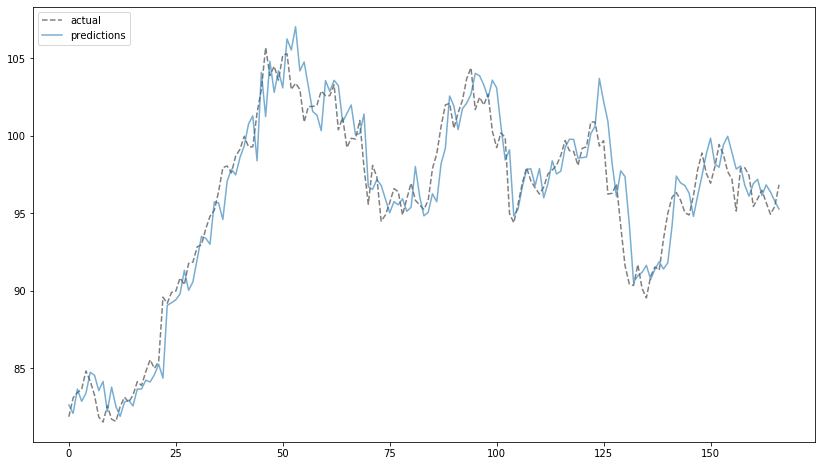

In [46]:
plt.figure(figsize=(14,8))
plt.plot(preds.actual, 'k--', alpha=0.5, label='actual')
plt.plot(preds[preds.columns[1]], alpha=0.6, label='predictions')
plt.legend(loc='upper left')
plt.show()

Compute the correlation between predictions and actual values

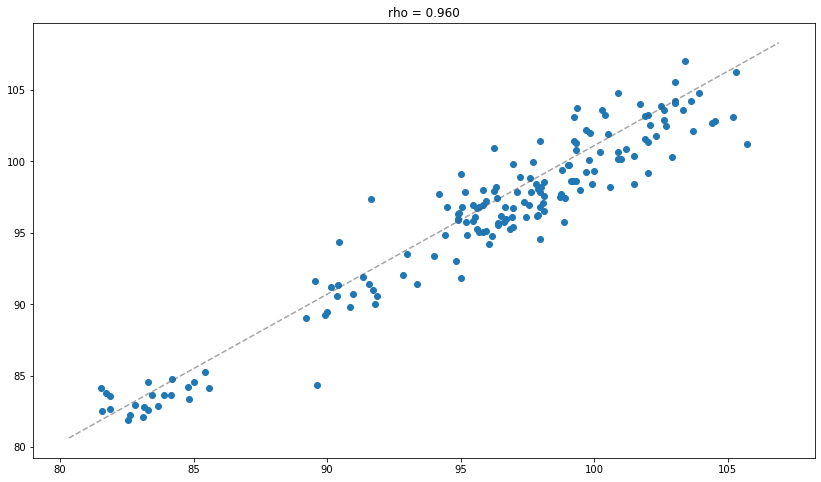

In [48]:
plt.figure(figsize=(14,8))
plt.scatter(preds.actual, preds[preds.columns[1]])
plt.plot(plt.xlim(), plt.ylim(), ls='--', c='.3', alpha=0.5)
plt.title('rho = {:.3f}'.format(pearsonr(preds.actual, preds[preds.columns[1]])[0]))
plt.show()

# Multiple predictions

In [4]:
preds = pd.read_csv('../output/pred_acciona_2019_18yw20_18yw10_1.csv',
                    delimiter=',')
preds.head(3)

,actual,18yw20,18yw10,avg,avg_diff,median,med_diff,winner
0,81.88,82.6400,81.9840,82.3120,72.8120,82.3120,72.8120,18yw10
1,83.10,82.0975,82.1605,82.1290,73.3510,82.1290,73.3510,18yw10
2,83.44,83.6650,84.6640,84.1645,73.1045,84.1645,73.1045,18yw20


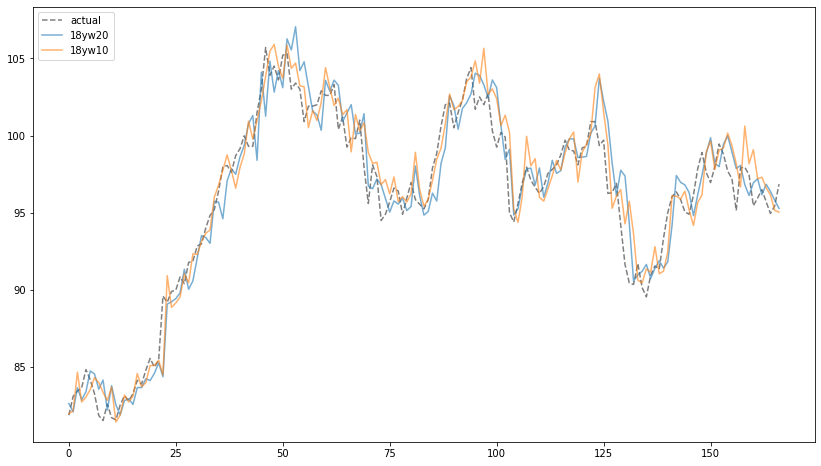

In [5]:
num_preds = preds.columns.get_loc('avg')-1

plt.figure(figsize=(14,8))
plt.plot(preds.actual.iloc[:200], 'k--', alpha=0.5, label='actual')
for i in range(num_preds):
    plt.plot(preds[preds.columns[i+1]], alpha=0.6, label=preds.columns[i+1])
plt.legend(loc='upper left')
plt.show()

Compute a simple matrix with the proportion of times that each network is performing as the best one.

In [29]:
net_names = preds.columns[1:num_preds+1]
print('Net names: {}'.format(net_names))
proportions = preds.winner.value_counts()
weights = pd.DataFrame({'proportion': proportions, 'weight': pd.Series(index=proportions.index)})
weights.weight = weights.proportion / weights.proportion.sum()
weights

Net names: Index(['18yw20', '18yw10'], dtype='object')


,proportion,weight
18yw10,96,0.57485
18yw20,71,0.42515


Add a new column with the weighted average of each prediction.

In [38]:
preds['w_avg'] = preds['18yw20'] * weights.loc['18yw20'].weight + preds['18yw10'] * weights.loc['18yw10'].weight

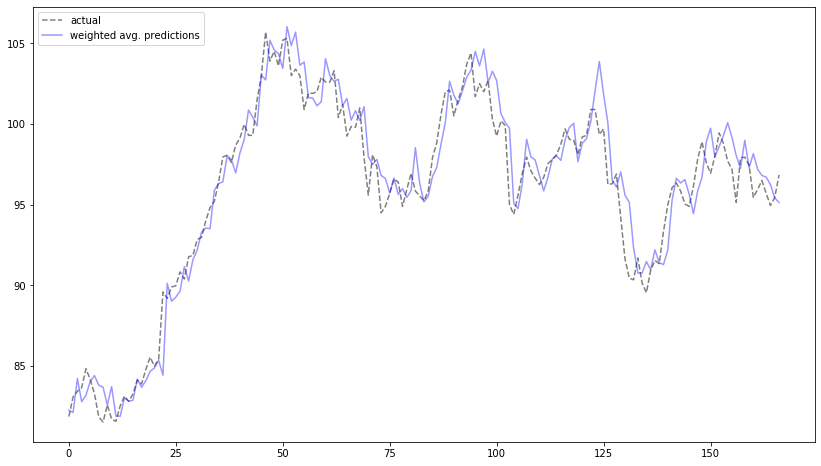

In [85]:
plt.figure(figsize=(14,8))
plt.plot(preds.actual, 'k--', alpha=0.5, label='actual')
plt.plot(preds['w_avg'], 'b-', alpha=0.4, label='weighted avg. predictions')
plt.legend(loc='upper left')
plt.show()

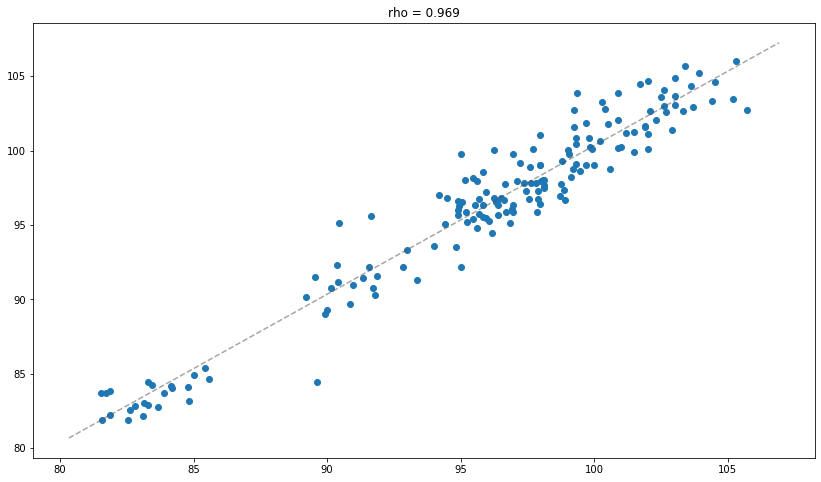

In [50]:
plt.figure(figsize=(14,8))
plt.scatter(preds.actual, preds['w_avg'])
plt.plot(plt.xlim(), plt.ylim(), ls='--', c='.3', alpha=0.5)
plt.title('rho = {:.3f}'.format(pearsonr(preds.actual, preds['w_avg'])[0]))
plt.show()

Compute the correlation with previous values

In [79]:
corrs = []
for shift in range(1, 11):
    starting_point = 10
    end_point = preds.shape[0]
    lower_limit = starting_point - shift
    upper_limit = end_point - shift
    p = pearsonr(preds.iloc[starting_point:end_point]['w_avg'], preds.iloc[lower_limit:upper_limit]['actual'])[0]
    corrs.append(p)

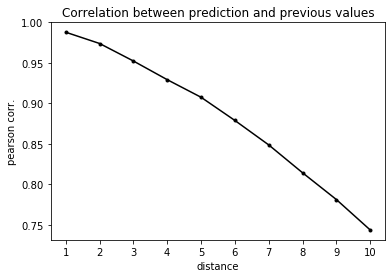

In [81]:
plt.plot(range(1, 11), corrs, 'k.-')
plt.xticks(range(1,11))
plt.title('Correlation between prediction and previous values')
plt.xlabel('distance')
plt.ylabel('pearson corr.')
plt.show()

In [86]:
preds.head()

,actual,18yw20,18yw10,avg,avg_diff,median,med_diff,winner,w_avg
0,81.88,82.6400,81.9840,82.3120,72.8120,82.3120,72.8120,18yw10,82.262898
1,83.10,82.0975,82.1605,82.1290,73.3510,82.1290,73.3510,18yw10,82.133716
2,83.44,83.6650,84.6640,84.1645,73.1045,84.1645,73.1045,18yw20,84.239275
3,83.66,82.8770,82.7350,82.8060,73.2340,82.8060,73.2340,18yw20,82.795371
4,84.84,83.3990,83.0550,83.2270,73.9930,83.2270,73.9930,18yw20,83.201251


# Convert to input to RL-Model

In [91]:
preds[['actual','w_avg']].to_csv('../output/forecast_acciona_2019.csv', 
                                 header=['test_y', 'forecast'],
                                 index=False, float_format='%.2f')